In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from  sklearn.preprocessing import  StandardScaler
from sklearn import svm


Content	Data collected at the children's level (MICS Under Five Children's questionnaire modules: Under-five child information panel, Child's age, Birth registration, Early childhood development, Breastfeeding , Care of illness, Immunization, Under-five child selected for blood test.)

Dataset produced by UNICEF and Central Statistics Organization

In [2]:
#importing ch.csv which was converted from .sav format in R. Check get_Congo_to_csv.R file
#Set low_memory = False to avoid the warning about column numbers having mixed type values.
## 107,116,118,121,122,123,125,128,130,138,153,158,167,168,169

df = pd.read_csv('ch.csv', low_memory = False)

In [3]:
df.describe()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF8D,UF8M,UF8Y,...,CDOI,CDOB,CAGE,CAGE_6,CAGE_11,melevel,religion,wscore,windex5,chweight
count,11245.000000,11245.000000,11245.000000,11245.000000,11245.000000,11245.000000,11245.000000,11245.000000,11245.000000,11245.0,...,11245.000000,11093.000000,11093.000000,11093.000000,11093.000000,11245.000000,11245.000000,11245.000000,11245.000000,11245.000000
mean,197.041974,100.002045,5.942374,197.041974,100.002045,5.942374,2.312672,15.582214,2.739707,2010.0,...,1322.739707,1294.745695,27.550798,3.744704,2.859281,2.136950,9.059315,0.037520,2.992708,0.986483
std,109.647359,85.478026,2.522024,109.647359,85.478026,2.522024,1.465379,8.257028,0.588422,0.0,...,0.588422,16.870120,16.881971,1.572419,1.394613,0.768528,24.119801,0.943380,1.427216,0.816790
min,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2010.0,...,1322.000000,1263.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-0.850643,0.000000,0.000000
25%,100.000000,29.000000,4.000000,100.000000,29.000000,4.000000,2.000000,9.000000,2.000000,2010.0,...,1322.000000,1280.000000,13.000000,3.000000,2.000000,2.000000,1.000000,-0.632641,2.000000,0.441745
50%,200.000000,74.000000,6.000000,200.000000,74.000000,6.000000,2.000000,16.000000,3.000000,2010.0,...,1323.000000,1296.000000,27.000000,4.000000,3.000000,2.000000,2.000000,-0.358324,3.000000,0.917851
75%,291.000000,156.000000,7.000000,291.000000,156.000000,7.000000,2.000000,22.000000,3.000000,2010.0,...,1323.000000,1310.000000,42.000000,5.000000,4.000000,3.000000,4.000000,0.351064,4.000000,1.352023
max,383.000000,452.000000,26.000000,383.000000,452.000000,26.000000,24.000000,31.000000,5.000000,2010.0,...,1325.000000,1324.000000,59.000000,6.000000,5.000000,9.000000,99.000000,3.927283,5.000000,9.054754


In [4]:
#Convert column with mixed types to object type.

df.iloc[:,[107,116,118,121,122,123,125,128,130,138,153,158,167,168,169]] = df.iloc[:,[107,116,118,121,122,123,125,128,130,138,153,158,167,168,169]].astype(object)
g = df.columns.to_series().groupby(df.dtypes).groups
g

{dtype('int64'): Index(['HH1', 'HH2', 'LN', 'UF1', 'UF2', 'UF4', 'UF6', 'UF8D', 'UF8M', 'UF8Y',
        'UF9', 'UF11', 'HH6', 'HH7', 'HL4', 'PSU', 'stratum', 'CDOI', 'melevel',
        'religion', 'windex5'],
       dtype='object'),
 dtype('float64'): Index(['UF12H', 'UF12M', 'UF13H', 'UF13M', 'AG1D', 'AG1M', 'AG1Y', 'AG2',
        'BR1', 'BR1AD',
        ...
        'TN12_4', 'TN12A', 'ED4A', 'ED4B', 'CDOB', 'CAGE', 'CAGE_6', 'CAGE_11',
        'wscore', 'chweight'],
       dtype='object', length=188),
 dtype('O'): Index(['UF7', 'UF10', 'EC7AA', 'EC7AB', 'EC7AX', 'EC7AY', 'EC7BA', 'EC7BB',
        'EC7BX', 'EC7BY', 'EC7CA', 'EC7CB', 'EC7CX', 'EC7CY', 'EC7DA', 'EC7DB',
        'EC7DX', 'EC7DY', 'EC7EA', 'EC7EB', 'EC7EX', 'EC7EY', 'EC7FA', 'EC7FB',
        'EC7FX', 'EC7FY', 'CA6A', 'CA6B', 'CA6C', 'CA6G', 'CA6H', 'CA6L',
        'CA6M', 'CA6N', 'CA6O', 'CA6Q', 'CA6X', 'CA11A', 'CA11B', 'CA11C',
        'CA11D', 'CA11H', 'CA11I', 'CA11J', 'CA11K', 'CA11L', 'CA11O', 'CA11P',
        'CA11

In [5]:
#Set the target to column IM6 - Child ever received any vaccinations
#Seperate the target column from the df.

target = df['IM6']
df.drop('IM6', axis=1, inplace=True)

In [6]:
#One hot encoding of categorical values using get_dummies function

dummies = pd.get_dummies(df)
dummies.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF8D,UF8M,UF8Y,...,AN1_Z01,AN1_Z11,AN1_Z12,AN1_Z13,AN1_Z21,AN1_Z22,AN1_Z23,AN1_Z31,AN1_Z32,AN1_Z33
0,1,1,3,1,1,3,2,14,2,2010,...,0,0,0,0,0,0,0,0,0,0
1,1,1,4,1,1,4,2,14,2,2010,...,0,0,0,0,0,0,0,0,0,0
2,1,21,6,1,21,6,1,15,2,2010,...,0,0,0,0,0,0,0,0,0,0
3,1,21,7,1,21,7,1,15,2,2010,...,0,0,0,0,0,0,0,0,0,0
4,1,21,8,1,21,8,1,15,2,2010,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Replace NaN with 0

dummies = dummies.fillna(0)

In [8]:
target.unique()

array([nan,  1.,  8.,  2.,  9.])

1	Yes	    - 6021   
2	No	    - 1279  
8	DK	    - 102	  
9	Missing - 3

In [9]:
#Creating a column for the target variable

dummies['vaccine'] = target

In [10]:
#Creating a binary variable since by coding Yes to 1 and any other response as 0.

dummies['has_been_vaccinated'] = dummies.vaccine.apply(lambda x: 1 if x == 1 else 0)
dummies.drop('vaccine', axis=1, inplace=True)
y=['has_been_vaccinated']
dummy_vars =dummies.columns.values.tolist()
X=[i for i in dummy_vars if i not in y]

In [15]:
train_labels = np.array(dummies[y])
train_features = np.array(dummies[X])
X_train, X_test, y_train, y_test = train_test_split(train_features,train_labels,test_size=0.33,random_state=0)

In [16]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (7534, 1067)
Training Labels Shape: (7534, 1)
Testing Features Shape: (3711, 1067)
Testing Labels Shape: (3711, 1)


In [17]:
# creating odd list of K for KNN
myList = list(range(1,100))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train.ravel(), cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [18]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
neighbors = filter(lambda x: x % 2 != 0, myList)

mse_min_index = MSE.index(min(MSE))
neighbors_list = list(neighbors)

The optimal number of neighbors is 7


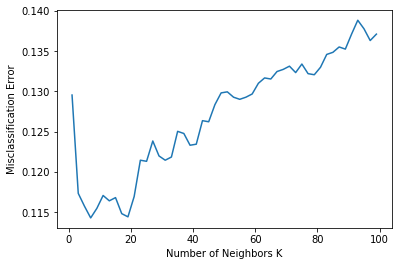

In [19]:
print("The optimal number of neighbors is %d" % neighbors_list[mse_min_index])

# plot misclassification error vs k
plt.plot(neighbors_list, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [20]:
#instantiate optimum value of k
optimum_k = neighbors_list[mse_min_index]

# instantiate learning model 
knn = KNeighborsClassifier(n_neighbors= optimum_k)

# fitting the model
knn.fit(X_train, y_train.ravel())

# predict the response
pred = knn.predict(X_test)

In [21]:
# evaluate accuracy
print('Accuracy of knn classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of knn classifier on test set: 0.89


In [22]:
#Overall classification report

print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.92      0.83      0.87      1698
          1       0.87      0.94      0.90      2013

avg / total       0.89      0.89      0.89      3711



In [28]:
#Transform the data using PCA

pca=PCA(n_components= 100)
X_train_transformed=pca.fit_transform(X_train)
X_test_transformed=pca.fit_transform(X_test)

print("Shape of feature space before PCA:"+ str(X_train.shape))
print("Shape of feature space after PCA:"+ str(X_train_transformed.shape))

Shape of feature space before PCA:(7534, 1067)
Shape of feature space after PCA:(7534, 100)


In [29]:
#Train the model with X_train after modification
knn.fit(X_train_transformed,y_train.ravel())
y2=knn.predict(X_train_transformed)
#Checking accuracy against the training data after PCA
print('Accuracy of knn classifier on test set after PCA is: {:.2f}'.format(knn.score(X_test_transformed, y_test)))

Accuracy of knn classifier on test set after PCA is: 0.83
